In [116]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy) 
    bin_n = 9 # Number of bins
    bin = np.int32(bin_n*ang/(2*np.pi))
   
    
    bin_cells = []
    mag_cells = []

    cellx = celly = 8

    for i in range(0,img.shape[0]/celly):
        for j in range(0,img.shape[1]/cellx):
            bin_cells.append(bin[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])
            mag_cells.append(mag[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])  
    
    print len(bin_cells)
    print len(mag_cells)

    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    print len(hists)
    
    hist = np.hstack(hists)
    print hist.shape
    print len(hist)
    print type(hist)
    
    
    
    # transform to Hellinger kernel
    eps = 1e-7
    hist /= hist.sum() + eps
    hist = np.sqrt(hist)
    hist /= linalg.norm(hist) + eps

    return hist

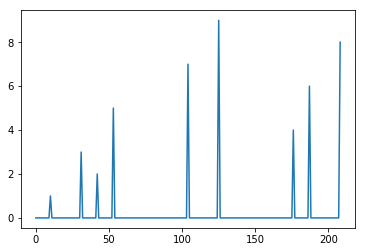

In [7]:
bin_cells=np.array([[10],[20],[10],[10],[50],[20],[50],[10],[20]])
mag_cells=np.array([[1],[3],[2],[5],[7],[9],[4],[6],[8]])
bin_n=4
hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
hist = np.hstack(hists)
plt.plot(np.array(hist))
plt.show()

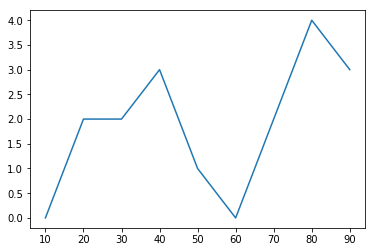

In [8]:
freq=np.array([[0],[2],[2],[3],[1],[0],[2],[4],[3]])
data=np.array([[10],[20],[30],[40],[50],[60],[70],[80],[90]])
plt.plot(data,freq)
plt.show()

In [9]:
x=np.array([0,50,50,100,100,50,50,50,50,100,100,1000])
w=np.array([10,10,10,10,10,10,10,10,10,10,10,10])

np.histogram(x,bins=[i*20 for i in range(0,9)],weights=w)

(array([10,  0, 60,  0,  0, 40,  0,  0]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160]))

In [10]:
x=np.array([0,50,50,100,100,50,50,50,50,100,100,1000])
w=np.array([1,1,1,1,1,1,1,1,1,1,1,1])

np.histogram(x,bins=[i*20 for i in range(0,9)],weights=w)

(array([1, 0, 6, 0, 0, 4, 0, 0]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160]))

img1 = cv2.imread('/home/arundhati/cv/dlib_project/eye/1.jpg')
img2= cv2.imread('/home/arundhati/cv/dlib_project/eye/2.jpg')
img3= cv2.imread('/home/arundhati/cv/dlib_project/eye/3.jpg')
img4= cv2.imread('/home/arundhati/cv/dlib_project/eye/4.jpg')

24
24
24
(216,)
216
<type 'numpy.ndarray'>


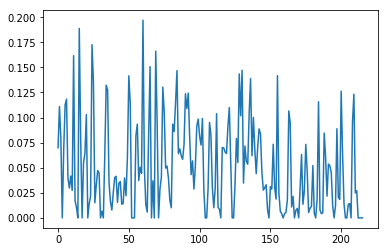

16
16
16
(144,)
144
<type 'numpy.ndarray'>


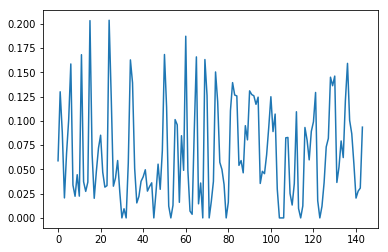

21
21
21
(189,)
189
<type 'numpy.ndarray'>


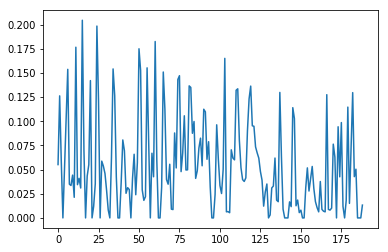

24
24
24
(216,)
216
<type 'numpy.ndarray'>


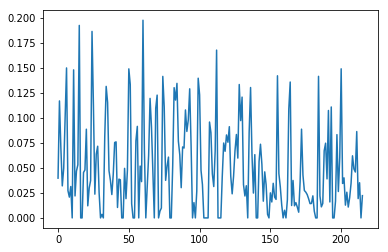

21
21
21
(189,)
189
<type 'numpy.ndarray'>


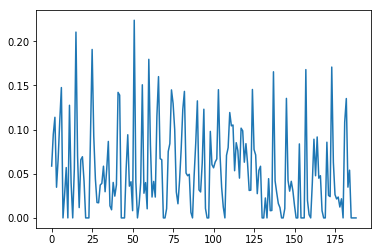

21
21
21
(189,)
189
<type 'numpy.ndarray'>


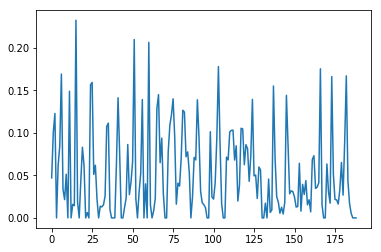

21
21
21
(189,)
189
<type 'numpy.ndarray'>


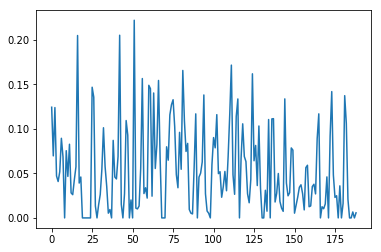

16
16
16
(144,)
144
<type 'numpy.ndarray'>


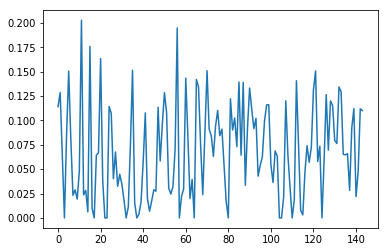

24
24
24
(216,)
216
<type 'numpy.ndarray'>


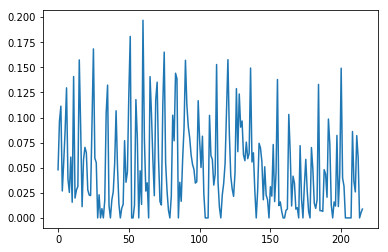

In [11]:
for i in range(1,10,1):
    plt.plot(hog(cv2.imread('/home/arundhati/cv/dlib_project/eye/'+str(i)+'.jpg')))
    plt.show()
    
    

mag 24 71 3
angle 24 71 3
... [[[   0.            0.            0.        ]
  [  96.           96.           96.        ]
  [  10.           10.           10.        ]
  ..., 
  [  80.           80.           80.        ]
  [  46.           46.           46.        ]
  [   0.            0.            0.        ]]

 [[  56.           56.           56.        ]
  [  80.11241913   80.11241913   80.11241913]
  [   9.89949512    9.89949512    9.89949512]
  ..., 
  [  69.58448029   69.58448029   69.58448029]
  [  34.40930176   34.40930176   34.40930176]
  [  38.           38.           38.        ]]

 [[  56.           56.           56.        ]
  [  34.20526123   34.20526123   34.20526123]
  [  32.80244064   32.80244064   32.80244064]
  ..., 
  [ 107.56393433  107.56393433  107.56393433]
  [   7.6157732     7.6157732     7.6157732 ]
  [  20.           20.           20.        ]]

 ..., 
 [[  24.           24.           24.        ]
  [  64.56005096   64.56005096   64.56005096]
  [  36.13862

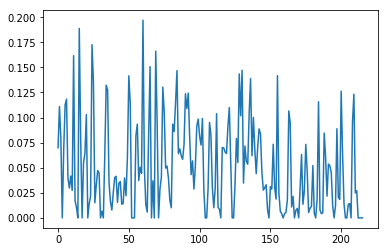

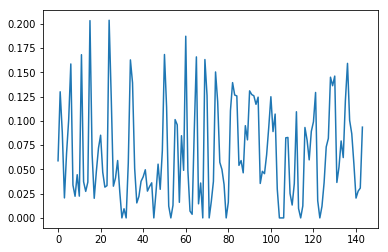

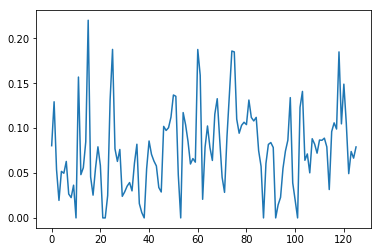

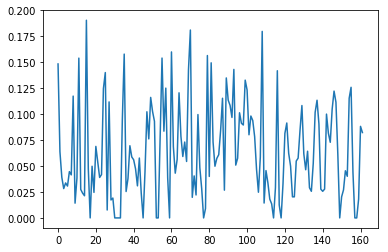

In [10]:
a=hog(img1)
b=hog(img2)
c=hog(img3)
d=hog(img4)
plt.plot(a)
plt.show()
plt.plot(b)
plt.show()
plt.plot(c)
plt.show()
plt.plot(d)
plt.show()

In [3]:
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

In [4]:
def hog1(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0,ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1,ksize=1)
    mag, ang = cv2.cartToPolar(gx, gy,angleInDegrees=True) 
    #bin_n = 9# Number of bins
    #bin1 = np.int32(bin_n*ang/(2*np.pi))
    #print bin1
   
    
    bin_cells = []
    mag_cells = []

    cellx = celly = 8
    
    #print img.shape[0]
    #print img.shape[1]
    
    
    for i in range(0,img.shape[0]/celly):
        for j in range(0,img.shape[1]/cellx):
            bin_cells.append(ang[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])
            mag_cells.append(mag[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])  
    
    #print len(mag_cells)
    
    hists = [np.histogram(b.ravel(),bins=[i*20 for i in range(0,18)],weights=m.ravel()) for b, m in zip(bin_cells, mag_cells)]
   
     #print mag_cells[0]
    #print bin_cells[0]
    print len(hists)
    x=[]
    y=[]
    hist_array=[]
    
    for i in range(0,len(hists),1):
        hist_array.append(hists[i][0])
    hist_array=np.array(hist_array)    
    eps = 1e-7
    hist_array /= hist_array.sum() + eps
    hist_array = np.sqrt(hist_array)
    hist_array /= linalg.norm(hist_array) + eps
    for i in range(0,len(hists),1):
        x.append(hist_array[i])
        y.append(hists[i][1])
        
  
    fig = plt.figure(figsize=(20, 8))
    
    for p in range(1,len(hists)+1,1):
        fig.add_subplot(3,8,int(p))
        plt.plot([i*20 for i in range(0,17)],x[p-1])
    plt.show()
    
    return x
    

24


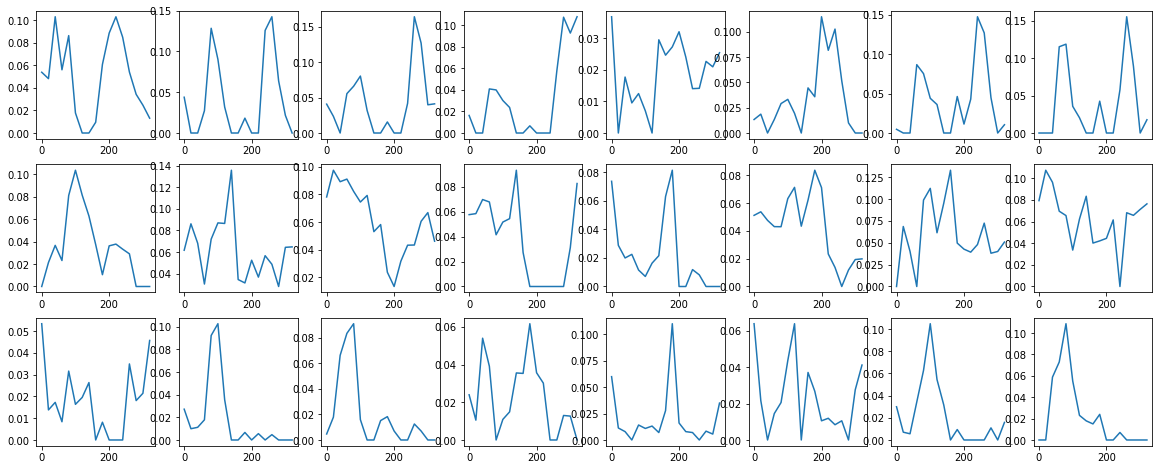

24


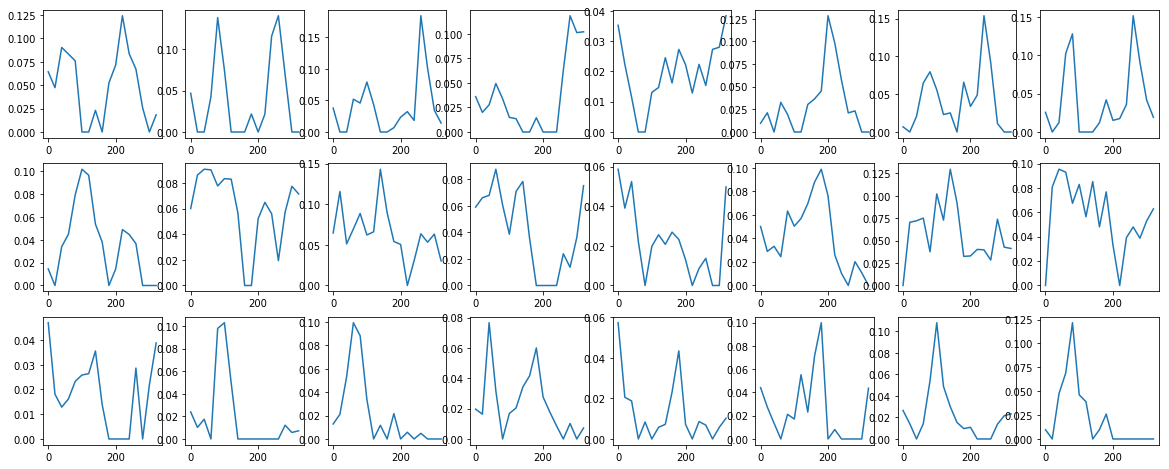

24


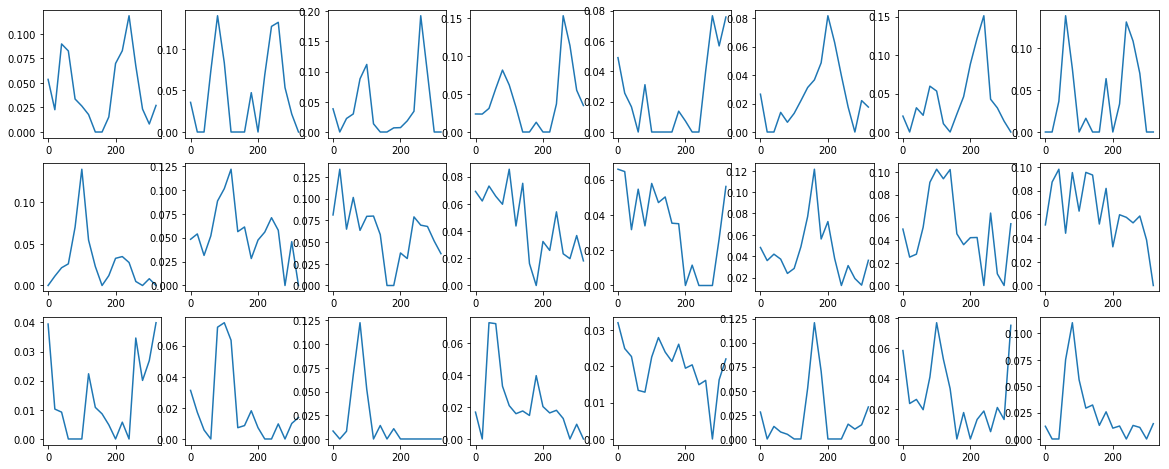

24


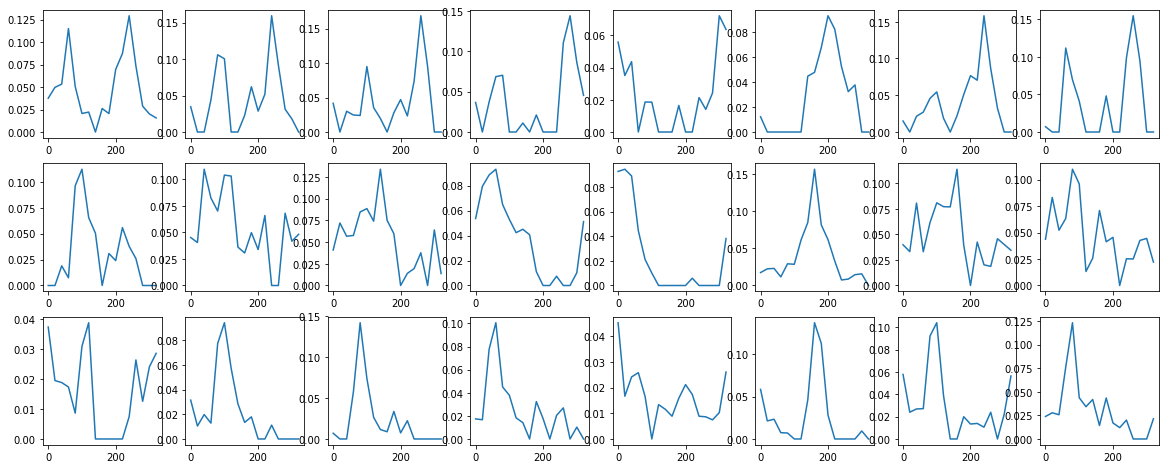

24


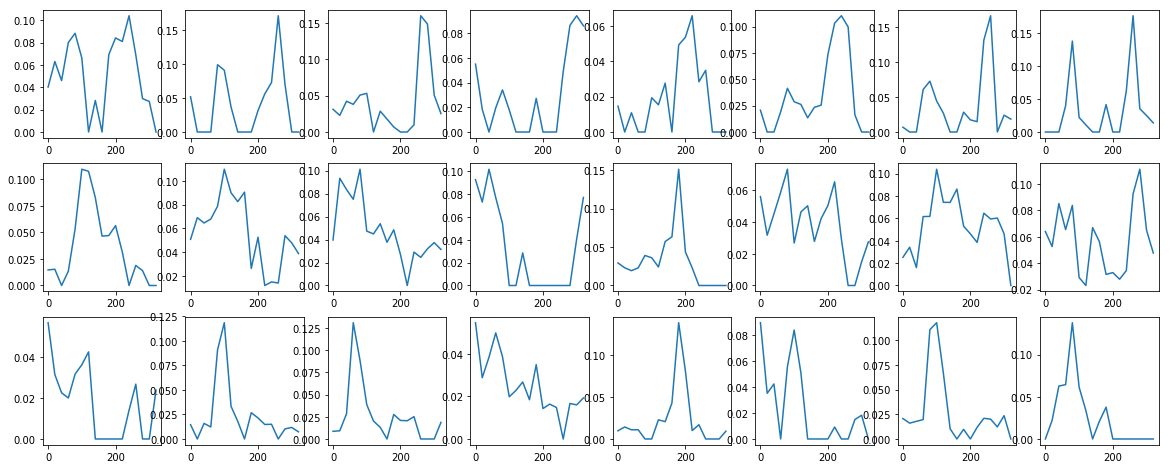

24


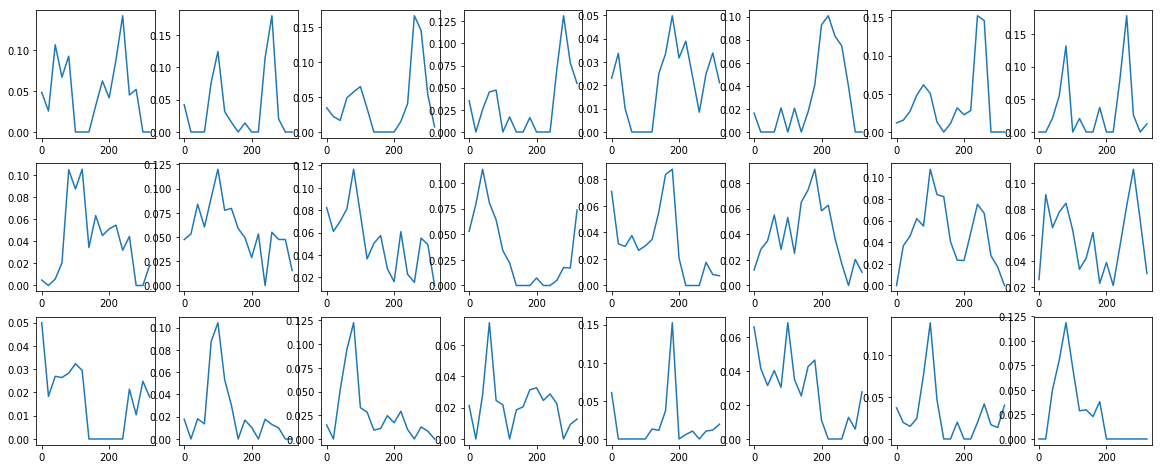

24


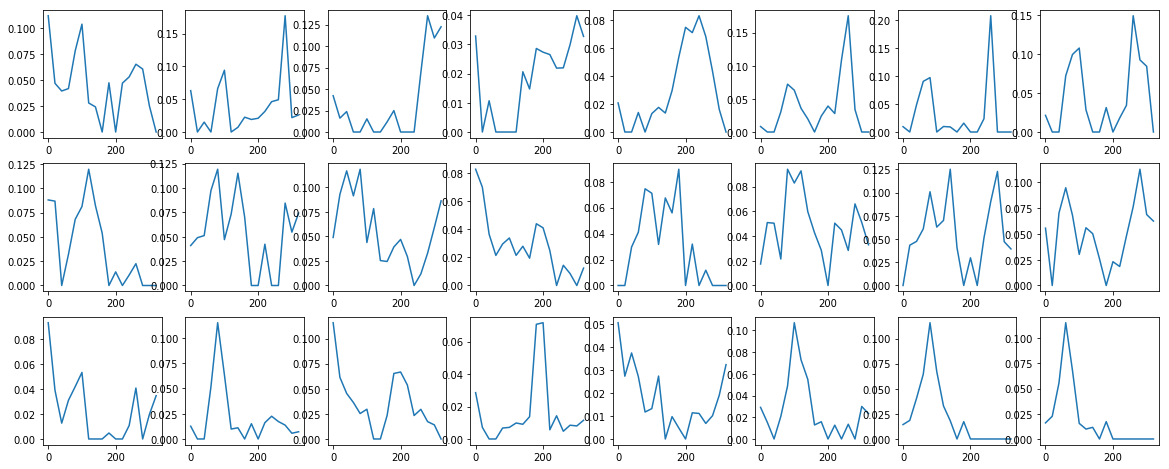

24


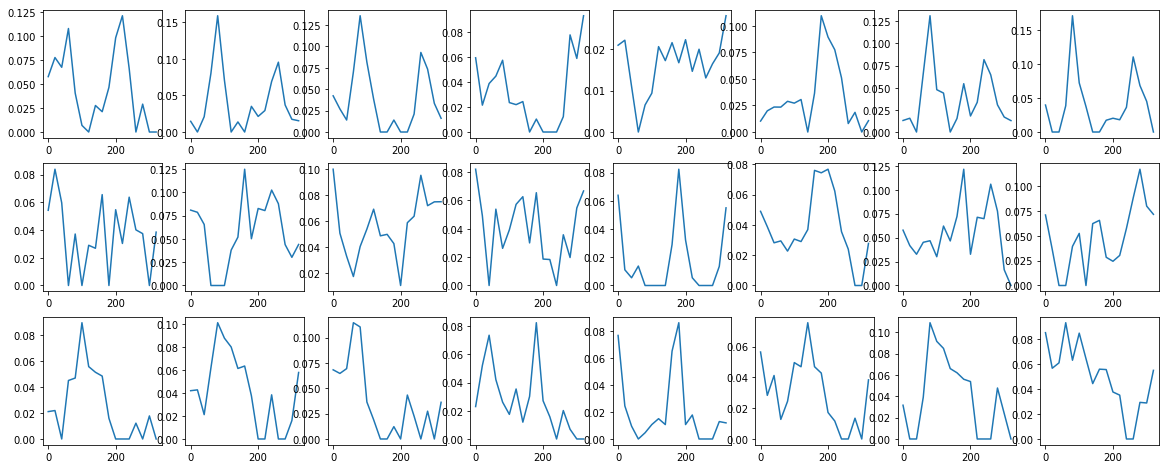

24


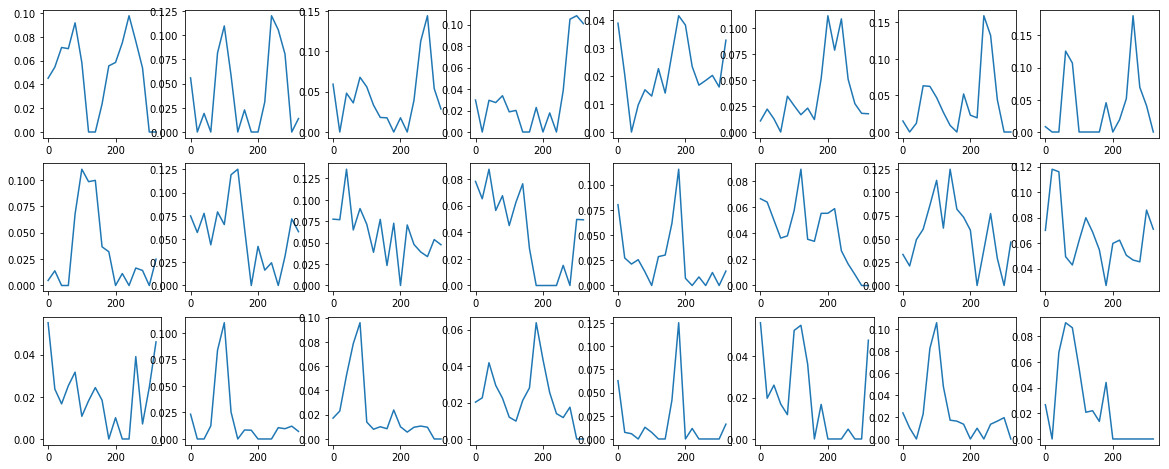

24


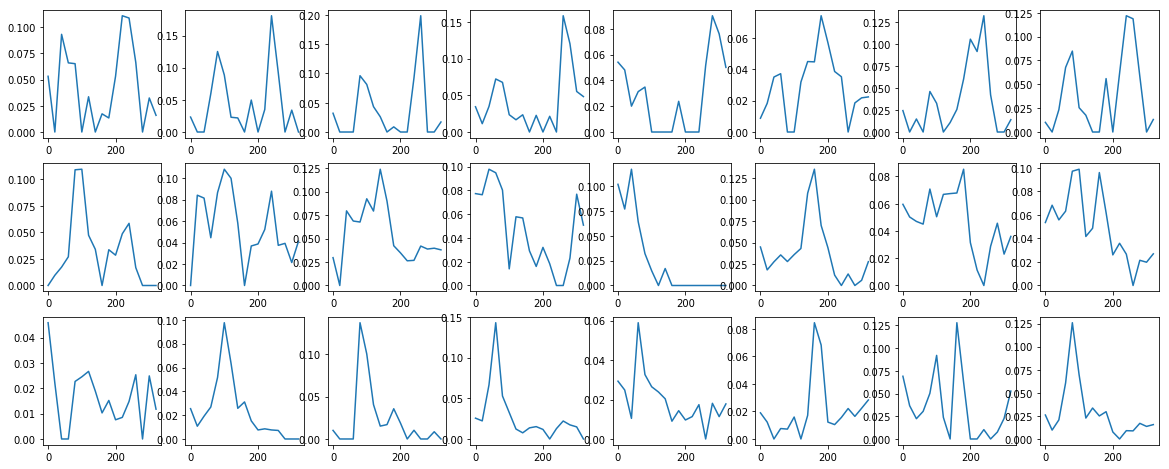

10


In [6]:
a=[]
path="/home/arundhati/cv/dlib_project/eye/"
for i in range(1,11,1):
    img = cv2.imread(path+str(i)+".jpg",0)
    a.append(hog1(img))
print len(a)
    
    


In [13]:
print len(a)#10 images
print len(a[0]) #24 cells each
print len(a[0][0]) #17 bins worth magnitude

print a

10
24
17
[[array([ 0.05390975,  0.0482437 ,  0.10315435,  0.05608354,  0.08639903,
        0.01779775,  0.        ,  0.        ,  0.00955069,  0.06087299,
        0.08863346,  0.10311272,  0.0849663 ,  0.05409217,  0.03431508,
        0.02470424,  0.01314497], dtype=float32), array([ 0.0438718 ,  0.        ,  0.        ,  0.0273205 ,  0.12839819,
        0.09025494,  0.03186757,  0.        ,  0.        ,  0.01821677,
        0.        ,  0.        ,  0.12575713,  0.14255171,  0.0638533 ,
        0.02166348,  0.        ], dtype=float32), array([ 0.04080974,  0.02355529,  0.        ,  0.0556211 ,  0.06611674,
        0.08044803,  0.03184235,  0.        ,  0.        ,  0.01563204,
        0.        ,  0.        ,  0.04192653,  0.1642803 ,  0.12709351,
        0.03987602,  0.0412099 ], dtype=float32), array([ 0.01629358,  0.        ,  0.        ,  0.04088627,  0.03996012,
        0.03016065,  0.02369578,  0.        ,  0.        ,  0.00665182,
        0.        ,  0.        ,  0.        ,  

In [104]:
score= kullback_leibler_divergence(a[1][0],a[0][0])
print score

0.0473255


In [105]:
score= kullback_leibler_divergence(a[1][1],a[0][1])
print score


0.0203086


In [107]:
score= kullback_leibler_divergence(a[1][9],a[0][9])
print score

0.217462


In [111]:
for i in range(0,10,1):
    score= kullback_leibler_divergence(a[i][0],a[0][0])
    print score
    

0.0
0.0473255
-0.0269392
0.0784113
0.152962
0.111435
0.256306
0.0818385
0.135818
0.00862037


In [10]:
for i in range(0,24,1):
    score= kullback_leibler_divergence(a[0][i],a[0][0])
    print i+1,"->",score
    

1 -> 0.0
2 -> 0.535221
3 -> 0.633604
4 -> 0.596789
5 -> -0.287328
6 -> -0.0033748
7 -> 0.263591
8 -> 0.524576
9 -> 0.0205232
10 -> 0.326972
11 -> 0.536443
12 -> 0.305813
13 -> 0.0413097
14 -> 0.092719
15 -> 0.811048
16 -> 0.543181
17 -> -0.125932
18 -> 0.0920046
19 -> -0.12199
20 -> -0.19279
21 -> -0.0256806
22 -> -0.0340972
23 -> 0.107298
24 -> 0.0585924


In [48]:
#1st img 1st cell , 2nd img 1st cell

i=0
r=[]
while(i<=23):
    col=[]
    for k in range(0,10,1):
        col.append(a[k][i])
    r.append(col) 
    i=i+1
      
#r---->24x10x17


In [78]:
s=[]
i=0
while (i<=23):
    score=0
    for q in range(0,10,1):
        score=score+ kullback_leibler_divergence(r[i][q],r[i][0])
    i=i+1
    s.append(score/10)

t=np.sort(s)[::-1]
print "divergence","\t","cell"
for i in range(0,len(t),1):
    for j in range(0,len(t),1):
        if(t[i]==s[j]):
            print t[i],j+1
            



divergence 	cell
0.285681953281 13
0.268281415664 19
0.235856413655 5
0.200693741068 23
0.158208987676 22
0.153422419727 10
0.107446119562 9
0.105771286134 4
0.102004129719 14
0.101497175731 17
0.0959553321358 7
0.0875498915091 18
0.0870717074722 21
0.0851277038455 11
0.0846953006461 24
0.0845776796341 1
0.0772962555289 6
0.0744065823965 20
0.0541450114921 12
0.0506345493719 2
0.0251323994249 3
0.0089134292677 16
0.00468259081244 8
-0.0462575302459 15


In [ ]:
num=[13,19,5,23,22,10]


In [171]:
def hog2(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0,ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1,ksize=1)
    mag, ang = cv2.cartToPolar(gx, gy,angleInDegrees=True) 
    #bin_n = 9# Number of bins
    #bin1 = np.int32(bin_n*ang/(2*np.pi))
    #print bin1
   
    
    bin_cells = []
    mag_cells = []

    cellx = celly = 8
    
    for i in range(0,img.shape[0]/celly):
        for j in range(0,img.shape[1]/cellx):
            bin_cells.append(ang[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])
            mag_cells.append(mag[i*celly : i*celly+celly, j*cellx : j*cellx+cellx])  
    
    hists = [np.histogram(b.ravel(),bins=[i*20 for i in range(0,18)],weights=m.ravel()) for b, m in zip(bin_cells, mag_cells)]

    hist_array=[]
    
    num=[13,19,5,23,22,10]

    for i in num:
        hist_array.append(hists[i-1][0])
    
    hist_array=np.array(hist_array)    
    eps = 1e-7
    hist_array /= hist_array.sum() + eps
    hist_array = np.sqrt(hist_array)
    hist_array /= linalg.norm(hist_array) + eps
    return hist_array
    

In [172]:
l=[]
aa=[]
image_rootDir="/home/arundhati/cv/dlib_project/eyes"
for dirName, subdirList, fileList in os.walk(image_rootDir):
        for fname in fileList:
                print fname
                f=fname.split("-")
                l.append(f[0])
                label=os.path.basename(dirName)
                image_path = os.path.join(dirName, fname)
                img = cv2.imread(image_path,0)
                aa.append(hog2(img))
print len(l)

s8-1.jpg
s6-6.jpg
s3-4.jpg
s4 -4.jpg
s9-8.jpg
s5-2.jpg
s6-7.jpg
s8-6.jpg
s5-5.jpg
s9-4.jpg
s9-3.jpg
s1-3.jpg
s1-4.jpg
s8-5.jpg
s2-2.jpg
s5-8.jpg
s5-3.jpg
s6-2.jpg
s7-4.jpg
s5-4.jpg
s3-7.jpg
s2-7.jpg
s3-3.jpg
s7-8.jpg
s9-7.jpg
s9-1.jpg
s8-3.jpg
s1-7.jpg
s2-3.jpg
s4 -5.jpg
s4 -7.jpg
s5-6.jpg
s6-5.jpg
s9-2.jpg
s3-1.jpg
s8-4.jpg
s7-3.jpg
s6-4.jpg
s6-8.jpg
s7-5.jpg
s3-2.jpg
s4 -3.jpg
s9-5.jpg
s1-8.jpg
s7-7.jpg
s5-7.jpg
s1-2.jpg
s4 -1.jpg
s4 -8.jpg
s2-6.jpg
s3-5.jpg
s7-2.jpg
s8-7.jpg
s2-8.jpg
s2-4.jpg
s1-6.jpg
s4 -2.jpg
s1-1.jpg
s6-3.jpg
s3-8.jpg
s3-6.jpg
s4 -6.jpg
s2-5.jpg
s2-1.jpg
s8-8.jpg
s9-6.jpg
s5-1.jpg
s6-1.jpg
s7-6.jpg
s1-5.jpg
s8-2.jpg
s7-1.jpg
72


In [173]:
print (aa)    

[array([[ 0.03040207,  0.04943934,  0.05973783,  0.06837551,  0.10044251,
         0.11853655,  0.13420305,  0.17154433,  0.04238501,  0.05939857,
         0.09017074,  0.02347633,  0.        ,  0.03129124,  0.02482325,
         0.        ,  0.11085652],
       [ 0.11858544,  0.03963564,  0.13233736,  0.19162998,  0.20285274,
         0.13549268,  0.10194596,  0.10264736,  0.05824075,  0.09334126,
         0.        ,  0.03564147,  0.09358927,  0.01709634,  0.        ,
         0.        ,  0.07362556],
       [ 0.08522072,  0.        ,  0.02761722,  0.02885183,  0.00987058,
         0.02004264,  0.01173817,  0.05646489,  0.04305461,  0.082787  ,
         0.08914768,  0.04551987,  0.05781956,  0.06416392,  0.07454652,
         0.06908815,  0.07844373],
       [ 0.09289224,  0.05804291,  0.08784528,  0.16514839,  0.21835685,
         0.1778823 ,  0.14809743,  0.05451063,  0.08921247,  0.08803765,
         0.        ,  0.06169901,  0.05072406,  0.        ,  0.        ,
         0.0518427

In [176]:
m=[]
#aa dimn 72 x 6 x 17
for i in range(0,72,1):
    arr=[]
    for j in range(0,6,1):
        for k in range(0,17,1):
            arr.append(aa[i][j][k])
    m.append(np.array(arr))

m=np.array(m)
#=m.reshape(32,102)

In [175]:
type(arr)

list

In [177]:
X_train, X_test, y_train, y_test = train_test_split(m,l, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [178]:
scores = knn.score(X_test, y_test, sample_weight=None)
print "score ",scores

score  0.708333333333


In [193]:
aatest=[]
ipath="/home/arundhati/cv/dlib_project/try/test1.jpg"

im = cv2.imread(ipath,0)
aatest.append(hog2(im))
m1=[]
#aa dimn 72 x 6 x 17
for i in range(0,1,1):
    arr1=[]
    for j in range(0,6,1):
        for k in range(0,17,1):
            arr1.append(aatest[i][j][k])
    m1.append(np.array(arr1))

m1=np.array(m1)

In [191]:
b=knn.predict(m1)
print b

['s5']


In [194]:
b=knn.predict(m1)
print b

['s1']


In [170]:
import PIL
from PIL import Image
path="/home/arundhati/cv/dlib_project/eyes/dump/"
for i in range(1,48,1):
    im=Image.open(path+str(i)+".jpg")
    newIm = im.resize((71,24))
    newIm.save(path+str(i)+".jpg")
    

probs

17 elements in 17 bins(18 elmets for the loop) 17,18 not match for simple plot
np.hist will give no:of values in each bin and y scale becomes till 5
each cell is being plotted
simple plot is done 


    #plt.figure()
    #plt.title("HoG")
    #plt.xticks([i*20 for i in range(0,17)])
    #plt.yticks(x)
    
    
    #plt.hist(hists, bins=[i*20 for i in range(0,9)], weights=None)
    #plt.show()
    
    #for b, m in zip(bin_cells, mag_cells):
      #  plt.hist(b.ravel(),bins=[i*20 for i in range(0,9)],weights=m.ravel())
      #  plt.show()
        
    #hist = np.hstack(hists) 
    #a=np.transpose(hist)
        x= hists[0][0]
    y=hists[0][1]
    
    
    plt.plot([i*20 for i in range(0,17)],np.array(x))
    plt.show()
    
    
    p=hists[1][0]
    q=hists[1][1]
    print p,q
    
   
    plt.plot([i*20 for i in range(0,17)],np.array(p))
    plt.show()
    
    histq=np.hstack(hists)
print histq

eps = 1e-7
histq /= histq.sum() + eps
histq = np.sqrt(histq)
histq /= linalg.norm(histq) + eps
        